##  Introduction
`Naive Bayes` is a probabilistic machine learning algorithm that can be used in a wide variety of classification tasks.

Typical applications include filtering spam, classifying documents, sentiment prediction etc. It is based on the works of Rev. Thomas Bayes (1702) and hence the name.

## But why is it called ‘Naive’?

The name `naive` is used because it assumes the features that go into the model is independent of each other. That is changing the value of one feature, does not directly influence or change the value of any of the other features used in the algorithm.

## why is it so popular?

That’s because there is a significant advantage with NB. Since it is a probabilistic model, the algorithm can be coded up easily and the predictions made real quick. Real-time quick.

Because of this, it is easily scalable and is traditionally the algorithm of choice for real-world applications (apps) that are required to respond to user’s requests instantaneously.

But before you go into Naive Bayes, you need to understand what `Conditional Probability` is and what is the `Bayes Rule`.


## Definition of Multiplication theorem and conditional probability

If $A$ and $B$ be two events, then

$P(A\cap B)=P(A)\times P(B)$, provided $A$ and $B$ are independent. If not, the theorem becomes:
$$P(A\cap B)=P(A)\times P(B|A)$$

Here $P(B|A)$ is called the conditional probability for $B$.

>**Example:**

Consider a school with a total population of 100 persons. These 100 persons can be seen either as ‘Students’ and ‘Teachers’ or as a population of ‘Males’ and ‘Females’.

With below tabulation of the 100 people, what is the conditional probability that a certain member of the school is a ‘Teacher’ given that he is a ‘Man’?

\begin{array}{|l|c|c|c|}\hline
&Female&male&Total\\\hline
Teacher&8&12&20\\
Student&38&42&80\\\hline
Total&40&60&100\\\hline 
\end{array}



>**Solution:**

$P(Teacher|Man)=\dfrac{P(Man \cap Teacher)}{P(Man)}=\dfrac{12/100}{60/100}=\dfrac{12}{60}$

## The Bayes Rule
The Bayes Rule is a way of going from $P(X|Y)$, known from the training dataset, to find $P(Y|X)$.
$$P(Y|X)=\dfrac{P(X|Y)P(Y)}{P(X)}$$

## Naive Bayes algorithm

The algorithm is based on Bayes' theorem, which states that the probability of a hypothesis (in this case, a class label) given some observed evidence (in this case, a set of features) is proportional to the probability of the evidence given the hypothesis times the prior probability of the hypothesis.

The "naive" assumption in Naive Bayes is that the features are conditionally independent given the class label, which simplifies the calculation of the likelihood of the evidence given the hypothesis. This assumption, although not always true, often results in good performance in practice.

## Working of NB Algorithm

The algorithm works by first learning the prior probability of each class label and the conditional probability of each feature given each class label using a training set. Then, given a new example with a set of features, it calculates the posterior probability of each class label using Bayes' theorem and chooses the label with the highest probability as the predicted label for the example.

Naive Bayes is known for its simplicity, scalability, and speed, and it can work well even with small amounts of training data. However, it may not perform well if the independence assumption is strongly violated or if the feature distribution is skewed or multi-modal.

For observations in test or scoring data, the X would be known while Y is unknown. And for each row of the test dataset, you want to compute the probability of Y given the X has already happened..

What happens if Y has more than 2 categories? we compute the probability of each class of Y and let the highest win.

## Ingenious example of NB-Fruit data

1000 fruits which could be either ‘banana’, ‘orange’ or ‘other’. These are the 3 possible classes of the Y variable. We have data for the following X variables, all of which are binary (1 or 0).

- Long
- Sweet
- Yellow
The first few rows of the training dataset look like this:
\begin{array}{|l|l|l|l|}\hline
Fruit&Long&Sweet&Yellow\\\hline
Orange&0&1&0\\
Banana&1&1&0\\
Other&1&1&0\\\hline
\end{array}

## Aggregation table of fruit data

\begin{array}{|l|l|l|l|l|l|l|r|}\hline
Type&long&not\, long&sweet&not\, sweet&yellow&not\,yellow&Total\\\hline
Banana&400&100&350&150&450&50&500\\\hline
Orange&0&300&150&150&300&0&300\\\hline
Other&100&100&150&50&50&150&200\\\hline
Total&500&500&650&350&800&200&1000\\\hline
\end{array}

## the objective of the classifier

>To predict if a given fruit is a ‘Banana’ or ‘Orange’ or ‘Other’ when only the 3 features (long, sweet and yellow) are known.

Let’s say you are given a fruit that is: Long, Sweet and Yellow, can you predict what fruit it is?

This is the same of predicting the Y when only the X variables in testing data are known.

Let’s solve it by hand using Naive Bayes. The idea is to compute the 3 probabilities, that is the probability of the fruit being a banana, orange or other. Whichever fruit type gets the highest probability wins.

All the information to calculate these probabilities is present in the above tabulation.

### Step-1 Compute the ‘Prior’ probabilities

let’s compute from the training data. Out of 1000 records in training data, we have 500 Bananas, 300 Oranges and 200 Others.

So the respective priors are 0.5, 0.3 and 0.2. P(Y=Banana) = 500 / 1000 = 0.50 P(Y=Orange) = 300 / 1000 = 0.30 P(Y=Other) = 200 / 1000 = 0.20

### Step-2 Compute the probability of likelihood of evidences

 It is the product of conditional probabilities of the 3 features. If you refer back to the formula, it says P(X1 |Y=k).

Here X1 is ‘Long’ and k is ‘Banana’.

That means the probability the fruit is ‘Long’ given that it is a Banana. In the above table, you have 500 Bananas. Out of that 400 is long.

So, P(Long | Banana) = 400/500 = 0.8. Here, I have done it for Banana alone.

Probability of Likelihood for Banana P(x1=Long | Y=Banana) = 400 / 500 = 0.80 P(x2=Sweet | Y=Banana) = 350 / 500 = 0.70 P(x3=Yellow | Y=Banana) = 450 / 500 = 0.90.

So, the overall probability of Likelihood of evidence for Banana = 0.8 * 0.7 * 0.9 = 0.504

Similarly likelihood evidence for orange=$0.0\times 0.5\times 1.0=0.0$

Likelihood evidence for Others=$0.5\times 0.75\times 0.25=0.09375$

### Step 3 Compute the probability of evidence 

$P(X)=P(Long, sweet, yellow)=0.5\times 0.65\times 0.8=0.26$



### Calculating posterior probabilities
\begin{array}{lcl}
P(Banana|long,sweet,yellow)&=&\dfrac{P(long|Banana)P(Sweet|Banana)P(yellow|Banana)P(Banana)}{P(long,sweet,yellow)}\\
&=&0.504\times 0.50/0.26\\
&=&0.96\\
P(Orange|long,sweet,Yellow)&=&0.0\\
P(Others|long,sweet,yellow)&=&0.0721
\end{array}

## Laplace Correction?
The value of $P(Orange | Long, Sweet and Yellow)$ was zero in the above example, because, $P(Long | Orange)$ was zero.

That is, there were no ‘Long’ oranges in the training data.

It makes sense, but when you have a model with many features, the entire probability will become zero because one of the feature’s value was zero. To avoid this, we increase the count of the variable with zero to a small value (usually 1) in the numerator, so that the overall probability doesn’t become zero. This approach is called ‘Laplace Correction’.

## Gaussian Naive Bayes?
So far we’ve seen the computations when the X’s are categorical.

But how to compute the probabilities when X is a continuous variable?

If we assume that the X follows a particular distribution, then you can plug in the probability density function of that distribution to compute the probability of likelihoods.

If you assume the X’s follow a Normal (aka Gaussian) Distribution, which is fairly common, we substitute the corresponding probability density of a Normal distribution and call it the Gaussian Naive Bayes.

## Naive Bayes Classifier in Python

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
# import data
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()

In [ ]:
dataset = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
dataset["target"] = iris.target

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, [0,1,2, 3]].values
#X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Predict probabilities
probs_y=model.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)
probs_y

array([[0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.78, 0.22],
       [0.  , 0.91, 0.09],
       [0.  , 1.  , 0.  ],
       [0.  , 0.46, 0.54],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.16, 0.84],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


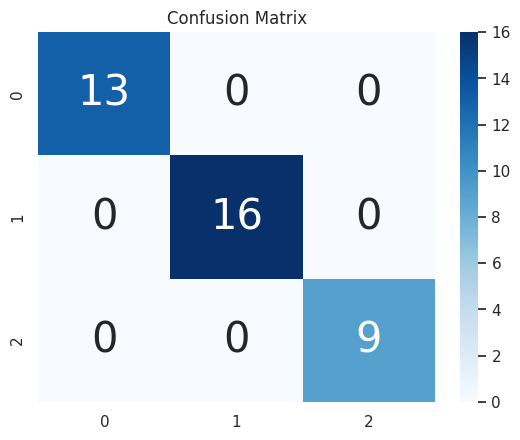

In [ ]:
# Plot confusion matrix
import seaborn as sns
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average=None))
print("Recall:",metrics.recall_score(y_test, y_pred,average=None))

Accuracy: 1.0
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]


In [ ]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred,average='micro'))

f1 score for base model is :  1.0
